# Visualizations results

In [51]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from utils_visualizations import flatten_data 

# remove waringns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file1 = "results-RF-anne.json"
file2= "results-RF-nadja.json"

with open(file1) as f:
    data1 = json.load(f)
print(len(data1))

with open(file2) as f:
    data2 = json.load(f)
print(len(data2))

data_all = data1 + data2
print(len(data_all))

73
116
189


In [3]:
data_all_flatten = flatten_data(data_all)
data = pd.DataFrame(data_all_flatten)
print(data.shape)
print(data.columns)
data.head()

(189, 39)
Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'seed', 'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_params_n_estimators',
       'unstratified_params_min_samples_split',
       'unstratified_params_min_samples_leaf',
       'unstratified_params_max_features', 'stratified_params_n_estimators',
       'stratified_params_min_samples_split',
       'stratified_params_min_samples_leaf', 'stratified_params_max_features',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_result

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
0,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0598,0.1246,0.9422,0.8073,0.0086,0.0308,0.0650,0.1246,303.64,313.17
1,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0490,0.1155,0.9727,0.8372,0.0048,0.0260,0.0490,0.1155,300.32,272.23
2,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0513,0.1227,0.9666,0.8227,0.0051,0.0284,0.0513,0.1227,303.37,297.96
3,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0738,0.1255,0.9279,0.8009,0.0106,0.0318,0.0738,0.1255,274.04,272.66
4,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0506,0.1215,0.9628,0.8008,0.0049,0.0318,0.0506,0.1215,293.70,289.65


Do first cleaning of data:

In [4]:
# drop n_train = 500
data = data[data.model_info_n_train!= 500]
print(data.shape)

# duplicates in data
print('duplicates: ', data.duplicated().sum())

# drop duplicates
data = data.drop_duplicates()
print(data.shape)

(166, 39)
duplicates:  0
(166, 39)


Unique Parameter Combinations:

In [169]:
unique_parameter_combinations = data.loc[:, model_info_variables[:-2]].drop_duplicates()
print("There are ", unique_parameter_combinations.shape[0], "parameter combinaitons:")
unique_parameter_combinations

There are  13 parameter combinaitons:


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring
23,RandomForestRegressor,200,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
33,RandomForestRegressor,200,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
43,RandomForestRegressor,200,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
53,RandomForestRegressor,200,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error
63,RandomForestRegressor,200,100000,10,0.5,sqrt,20,5,200,10,neg_mean_squared_error
73,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,20,neg_mean_squared_error
81,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
91,RandomForestRegressor,1000,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
101,RandomForestRegressor,1000,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
111,RandomForestRegressor,1000,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error


## Descriptives

### 1. Model Info

In [36]:
# corresponding model_info variables (categorical):
model_info_variables = ['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'hyperparameters_same']

# excluded: 'repetition', 'random_state',  'seed', 'model_info_json_file'

In [37]:
# give summary of every column
data_desciptives = data.loc[:, model_info_variables]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,hyperparameters_same
count,166,166,166,166,166.0,166,166,166,166,166,166,166,166
unique,1,2,1,1,3.0,2,2,1,1,2,3,1,2
top,RandomForestRegressor,1000,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error,-1,True
freq,166,116,166,166,88.0,108,118,166,166,90,118,166,129


In [38]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
RandomForestRegressor    166
Name: count, dtype: int64


model_info_n_train
1000    116
200      50
Name: count, dtype: int64


model_info_n_test
100000    166
Name: count, dtype: int64


model_info_n_features
10    166
Name: count, dtype: int64


model_info_FD_noise
0.0    88
2.0    68
0.5    10
Name: count, dtype: int64


model_info_transformation
identity    108
sqrt         58
Name: count, dtype: int64


model_info_n_groups
20    118
10     48
Name: count, dtype: int64


model_info_n_folds
5    166
Name: count, dtype: int64


model_info_n_iter
200    166
Name: count, dtype: int64


model_info_n_repetitions
10    90
20    76
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error     118
neg_mean_absolute_error     28
r2                          20
Name: count, dtype: int64


model_info_n_jobs
-1    166
Name: count, dtype: int64


hyperparameters_same
True     129
False     37
Name: count, dtype: int64



In [29]:
# How often are the hyperparameters the same?
print(100*data.groupby([data['hyperparameters_same']]).count()['model_info_model']/data.shape[0])

hyperparameters_same
False    22.289157
True     77.710843
Name: model_info_model, dtype: float64


### 2. Evaluation resutls

In [49]:
data.columns
# corresponding variables variables
evaluaton_variables = ['unstratified_params_n_estimators',
       'unstratified_params_min_samples_split',
       'unstratified_params_min_samples_leaf',
       'unstratified_params_max_features', 'stratified_params_n_estimators',
       'stratified_params_min_samples_split',
       'stratified_params_min_samples_leaf', 'stratified_params_max_features',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'unstratified_running_time', 'stratified_running_time']
len(evaluaton_variables)

22

In [47]:
data_desciptives = data.loc[:, evaluaton_variables]
data_desciptives.describe(include='all')


,unstratified_params_n_estimators,unstratified_params_min_samples_split,unstratified_params_min_samples_leaf,unstratified_params_max_features,stratified_params_n_estimators,stratified_params_min_samples_split,stratified_params_min_samples_leaf,stratified_params_max_features,unstratified_results_train r2,unstratified_results_test r2,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,756.692771,3.590361,1.475904,6.650602,765.277108,3.650602,1.433735,6.608434,0.963428,0.797169,...,0.545431,1.309552,0.963593,0.797182,0.697687,3.801013,0.544884,1.309487,492.242831,473.713072
std,150.718870,1.371008,0.535999,1.378921,147.611473,1.334246,0.543675,1.426052,0.014164,0.055926,...,0.358006,0.837333,0.014282,0.055894,0.596881,3.028924,0.357364,0.837227,1816.315993,1500.820737
min,506.000000,2.000000,1.000000,4.000000,506.000000,2.000000,1.000000,4.000000,0.916300,0.741100,...,0.066000,0.177500,0.916300,0.741200,0.007400,0.052400,0.065600,0.177500,272.450000,269.010000
25%,601.000000,3.000000,1.000000,6.000000,617.750000,3.000000,1.000000,6.000000,0.954050,0.752500,...,0.098350,0.250525,0.955600,0.752500,0.016525,0.105425,0.098350,0.250875,283.450000,284.687500
50%,788.500000,3.000000,1.000000,6.000000,791.000000,3.000000,1.000000,6.000000,0.964700,0.764950,...,0.664600,1.750800,0.964700,0.765100,0.742750,4.812100,0.669550,1.757700,302.745000,304.090000
75%,875.000000,4.000000,2.000000,7.000000,879.000000,5.000000,2.000000,7.000000,0.975300,0.877000,...,0.858100,2.079625,0.975800,0.877000,1.091900,6.838950,0.835025,2.079625,395.220000,393.445000
max,994.000000,9.000000,3.000000,10.000000,994.000000,9.000000,3.000000,10.000000,0.984600,0.889800,...,1.103700,2.139400,0.984500,0.889900,1.938400,7.198200,1.077700,2.139200,23714.190000,19609.320000


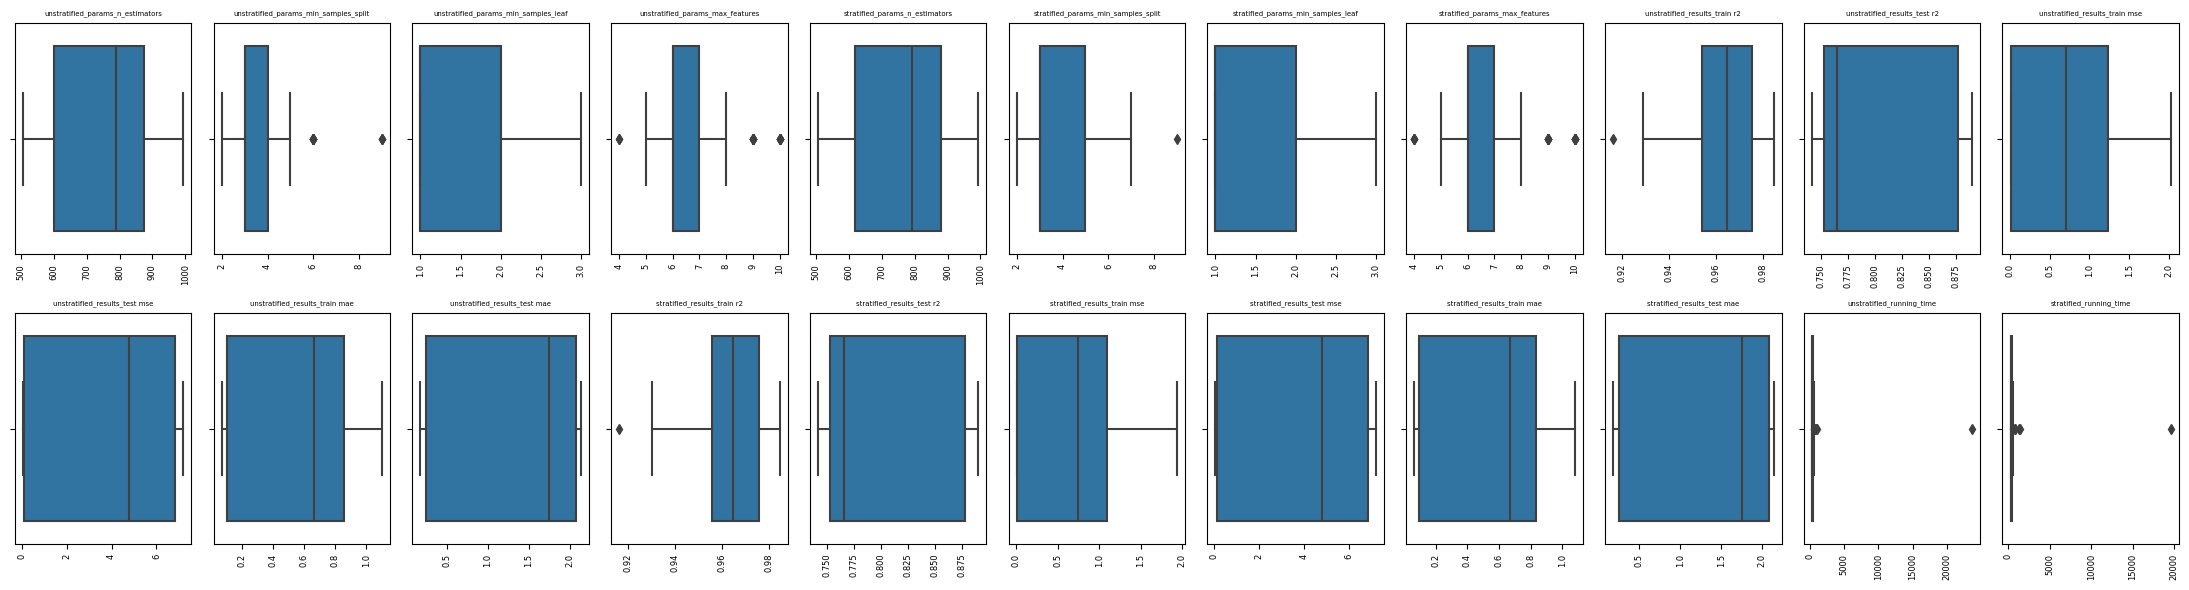

In [57]:
fig, axes = plt.subplots(2, 11, figsize=(22, 6))

for i, column in enumerate(data_desciptives.columns):
    ax = axes[i // 11, i % 11]
    sns.boxplot(x=data_desciptives[column], ax=ax)
    ax.set_title(column, fontsize=5) 
    ax.set_xlabel('', fontsize=5)  
    ax.set_ylabel('', fontsize=5) 
    ax.tick_params(axis='x', rotation=90, labelsize=6)  
    ax.tick_params(axis='y', labelsize=6)  

plt.tight_layout()
plt.show()
    

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data200, data1000, metric='r2', order=None):
    if order is None:
        order = [
            f'unstratified_results_train {metric}', 
            f'stratified_results_train {metric}'
        ]

    df_melted200 = pd.melt(data200, value_vars=order, var_name='Metric', value_name='Value')
    df_melted1000 = pd.melt(data1000, value_vars=order, var_name='Metric', value_name='Value')

    fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=False)

    for i in range(2):
        if i == 0:
            df_melted = df_melted200
            df=data200
            n_samples=200
        else:
            df_melted = df_melted1000    
            df=data1000
            n_samples=1000
        ax = sns.boxplot(x='Metric', y='Value', data=df_melted, ax=axes[i],
                         order=order,
                         showmeans=True,
                         meanline=True,
                         color="grey",
                         meanprops={"marker": "+",
                                    "markerfacecolor": "white",
                                    "markeredgecolor": "green",
                                    "markersize": "10"},
                         width=.5,
                         #linecolor="#137", linewidth=.75,
                    
                         medianprops={"color": "#137", "linewidth": 1})
        ax.set_ylabel(metric.upper())
        ax.set_xlabel('')
        plt.text(0.98, 0.98, f'N = {len(df)}', horizontalalignment='right', verticalalignment='top',
                 transform=ax.transAxes, size=14)
        xtickNames = plt.setp(ax, xticklabels=['Test Unstratified', 'Test Stratified'])
        plt.setp(xtickNames, rotation=0)
        ax.set_title(f'{n_samples} train samples')

    plt.show()

#### Boxplots Evaluation metrics

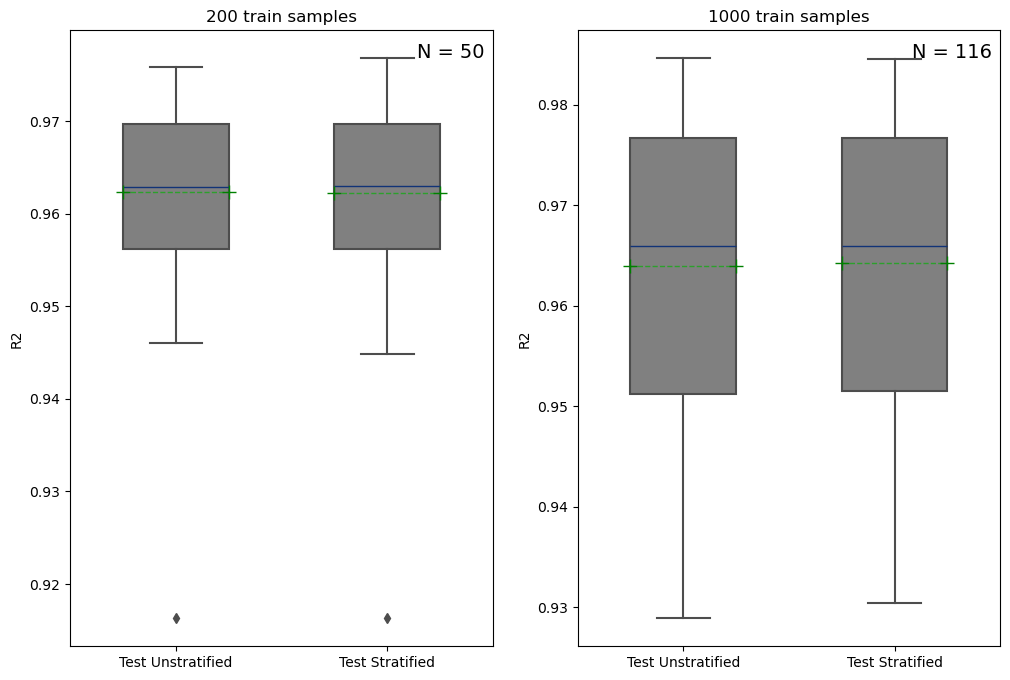

In [108]:
data_filtered_200 = data[(data['model_info_n_train'] == 200)]
data_filtered_1000 = data[(data['model_info_n_train'] == 1000)]

plot_boxplots(data_filtered_200, data_filtered_1000, metric='r2')

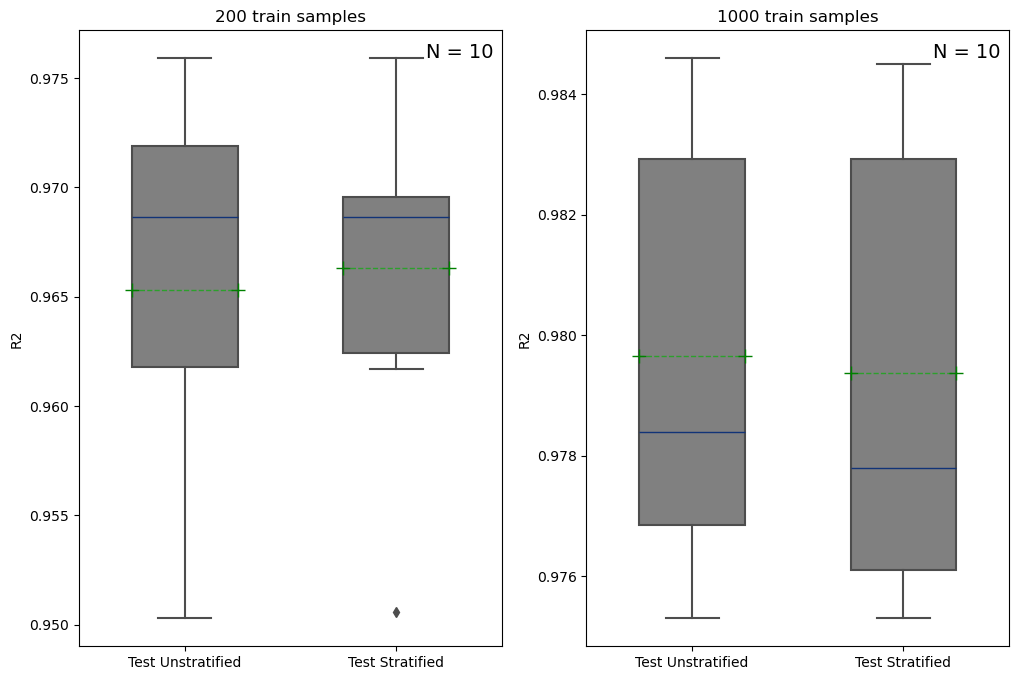

In [109]:
data_filtered = data[(data['model_info_model'] == 'RandomForestRegressor') & (data['model_info_transformation'] == 'identity')  & (data['model_info_n_features'] == 10) & (data['model_info_n_groups'] == 10) & (data['model_info_n_folds'] == 5) & (data['model_info_n_iter'] == 200) & (data['model_info_FD_noise'] == 0) & (data['model_info_scoring'] == 'neg_mean_squared_error')]
data_filtered_1 = data_filtered[(data_filtered['model_info_n_train'] == 200)]
data_filtered_2 = data_filtered[(data_filtered['model_info_n_train'] == 1000)]

plot_boxplots(data_filtered_1, data_filtered_2, metric='r2')

In [129]:
keys_with_none_value[0]


'model_info_n_train'

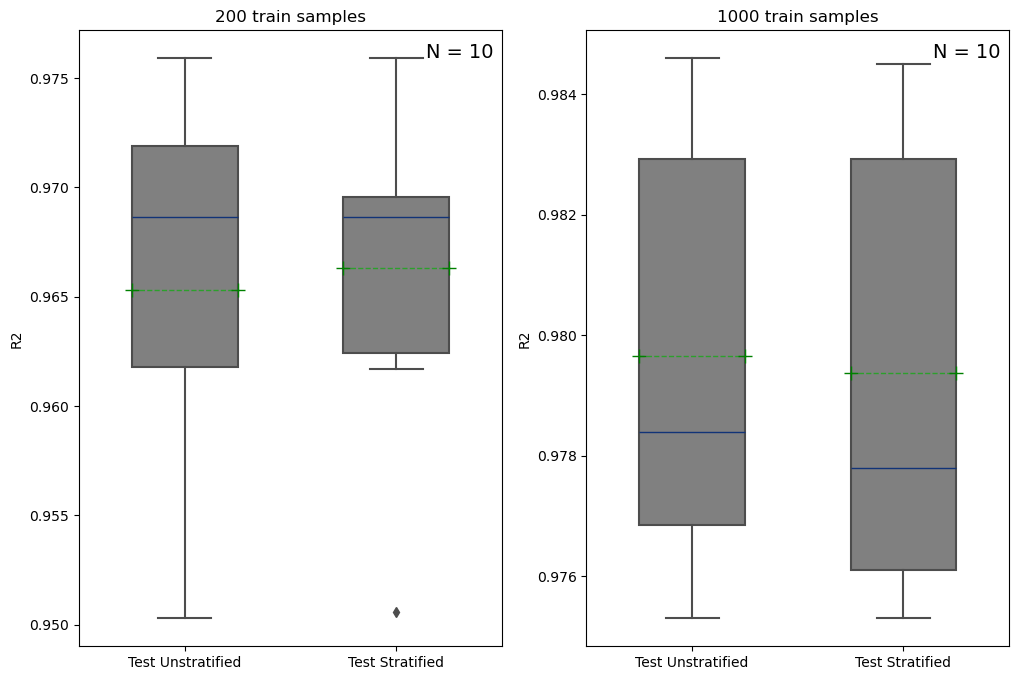

In [135]:
conditions = {
    "model_info_model": 'RandomForestRegressor',
    "model_info_transformation": 'identity',
    "model_info_n_train": None,
    "model_info_n_features": 10,
    "model_info_n_groups": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_FD_noise": 0,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1= 200
value2 = 1000

# write query for whole data
query_string = ' and '.join([f"{key} == {repr(value)}" for key, value in conditions.items() if value is not None])
data_filtered = data.query(query_string)

# comparison boxplots by one variable
keys_with_none_value = [key for key, value in conditions.items() if value is None]
data_filtered_1 = data_filtered[(data_filtered[keys_with_none_value[0]] == value1)]
data_filtered_2 = data_filtered[(data_filtered[keys_with_none_value[0]] == value2)]

# plot boxplots
plot_boxplots(data_filtered_1, data_filtered_2, metric='r2')



In [139]:
def filter_and_plot(data, conditions, value1, value2):
    # write query for whole data
    query_string = ' and '.join([f"{key} == {repr(value)}" for key, value in conditions.items() if value is not None])
    data_filtered = data.query(query_string)

    # comparison boxplots by one variable
    keys_with_none_value = [key for key, value in conditions.items() if value is None]
    data_filtered_1 = data_filtered[(data_filtered[keys_with_none_value[0]] == value1)]
    data_filtered_2 = data_filtered[(data_filtered[keys_with_none_value[0]] == value2)]

    # plot boxplots
    plot_boxplots(data_filtered_1, data_filtered_2, metric='r2')

In [ ]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
RandomForestRegressor    166
Name: count, dtype: int64


model_info_n_train
1000    116
200      50
Name: count, dtype: int64


model_info_n_test
100000    166
Name: count, dtype: int64


model_info_n_features
10    166
Name: count, dtype: int64


model_info_FD_noise
0.0    88
2.0    68
0.5    10
Name: count, dtype: int64


model_info_transformation
identity    108
sqrt         58
Name: count, dtype: int64


model_info_n_groups
20    118
10     48
Name: count, dtype: int64


model_info_n_folds
5    166
Name: count, dtype: int64


model_info_n_iter
200    166
Name: count, dtype: int64


model_info_n_repetitions
10    90
20    76
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error     118
neg_mean_absolute_error     28
r2                          20
Name: count, dtype: int64


model_info_n_jobs
-1    166
Name: count, dtype: int64


hyperparameters_same
True     129
False     37
Name: count, dtype: int64



['model_info_model',
 'model_info_n_train',
 'model_info_n_test',
 'model_info_n_features',
 'model_info_FD_noise',
 'model_info_transformation',
 'model_info_n_groups',
 'model_info_n_folds',
 'model_info_n_iter',
 'model_info_n_repetitions',
 'model_info_scoring']

13


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring
23,RandomForestRegressor,200,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
33,RandomForestRegressor,200,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
43,RandomForestRegressor,200,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
53,RandomForestRegressor,200,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error
63,RandomForestRegressor,200,100000,10,0.5,sqrt,20,5,200,10,neg_mean_squared_error
73,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,20,neg_mean_squared_error
81,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
91,RandomForestRegressor,1000,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
101,RandomForestRegressor,1000,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
111,RandomForestRegressor,1000,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error


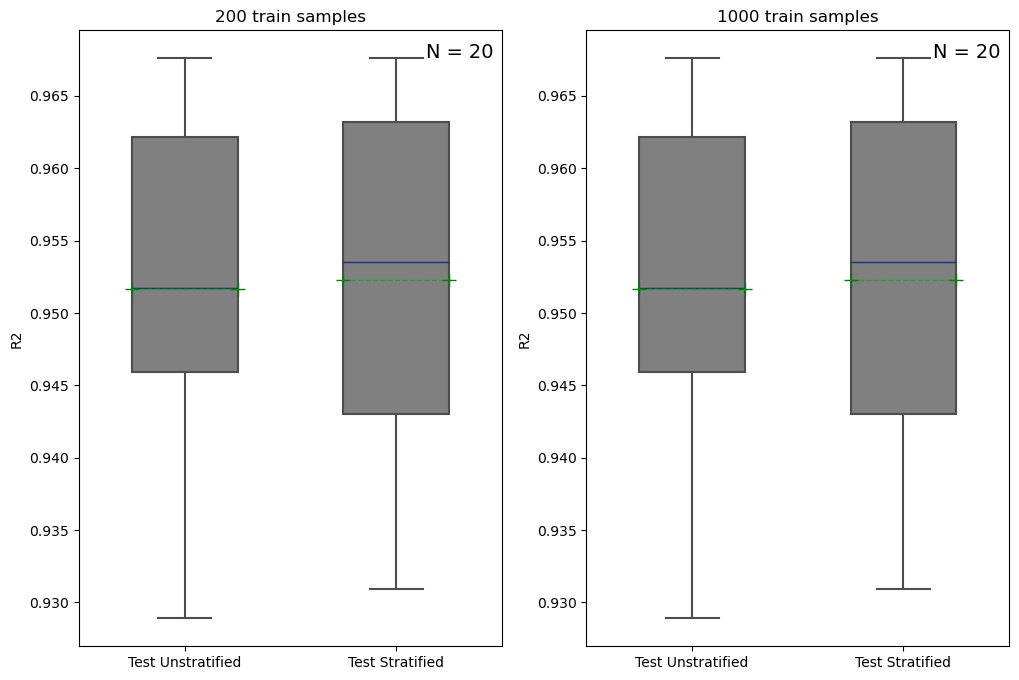

In [165]:
conditions = {
    "model_info_model": 'RandomForestRegressor',
    "model_info_transformation": 'identity',
    "model_info_n_train": 1000,
    "model_info_n_features": 10,
    "model_info_n_groups": 20,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_FD_noise": 2.0,
    "model_info_scoring": None
}
value1= 'r2'
value2 = 'neg_mean_squared_error'

filter_and_plot(data, conditions, value1, value2)

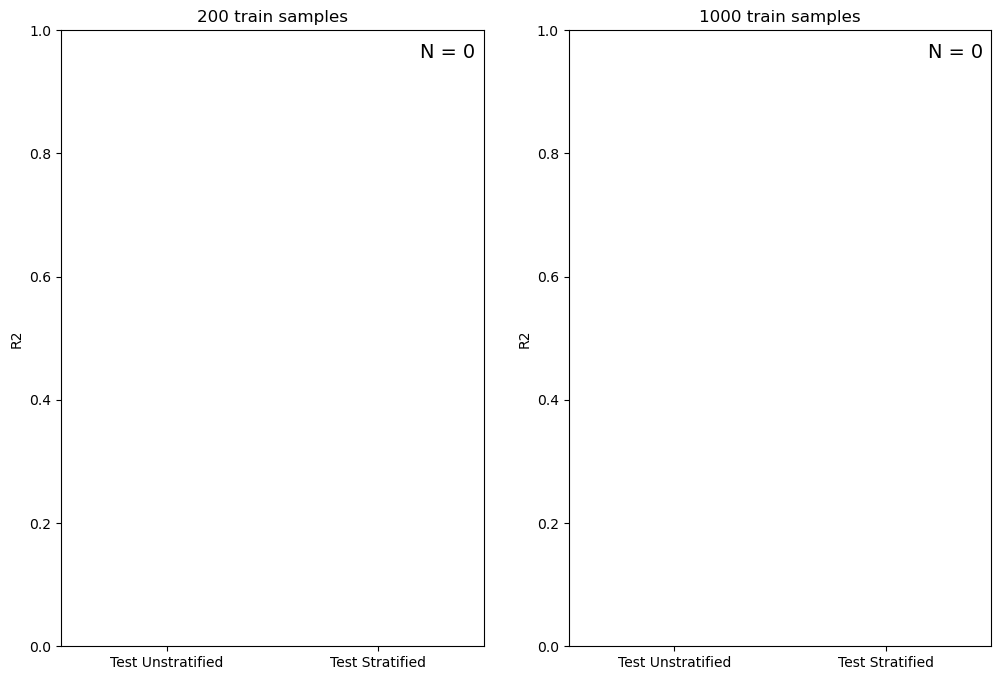

In [87]:
data_filtered = data[(data['model_info_model'] == 'RandomForestRegressor') &  (data['model_info_n_train'] == None) & (data['model_info_transformation'] == 'identity')  & (data['model_info_n_features'] == 10) & (data['model_info_n_groups'] == 10) & (data['model_info_n_folds'] == 5) & (data['model_info_n_iter'] == 200) & (data['model_info_FD_noise'] == 0) & (data['model_info_scoring'] == 'neg_mean_squared_error')]
data_filtered_1 = data_filtered[(data_filtered['model_info_n_train'] == 200)]
data_filtered_2 = data_filtered[(data_filtered['model_info_n_train'] == 1000)]

plot_boxplots(data_filtered_1, data_filtered_2, metric='r2')

In [53]:
# colum names data
print(data.columns)

# filter ['model', 'transformation', 'n_train', 'n_features', 'n_groups','n_folds', 'n_iter', 'noise'
filter = data.loc[99, ['model', 'transformation', 'n_train', 'n_features', 'n_groups','n_folds', 'n_iter', 'noise', 'scoring']]
filter

def filter_data(data, filter):
    data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]
    return data_filtered

# filter data with filter values
data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]
data_filtered


Index(['model', 'transformation', 'n_train', 'n_features', 'n_groups',
       'n_folds', 'n_iter', 'noise', 'scoring', 'seed', 'random_state',
       'hyperparameters_same', 'train_r2_unstratified', 'test_r2_unstratified',
       'train_mse_unstratified', 'test_mse_unstratified',
       'train_mae_unstratified', 'test_mae_unstratified',
       'train_r2_stratified', 'test_r2_stratified', 'train_mse_stratified',
       'test_mse_stratified', 'train_mae_stratified', 'test_mae_stratified'],
      dtype='object')


/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2732254034.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]


,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
91,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4984,3.1744,0.5415,1.4157,0.9783,0.8664,0.4984,3.1744,0.5415,1.4157
92,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4108,2.6791,0.4967,1.2932,0.9830,0.8872,0.4108,2.6791,0.4967,1.2932
93,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3739,2.7088,0.4783,1.3025,0.9845,0.8851,0.3770,2.7288,0.4781,1.3077
94,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3958,2.6172,0.4980,1.2811,0.9843,0.8898,0.3958,2.6172,0.4980,1.2811
95,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5535,2.7862,0.5773,1.3266,0.9767,0.8827,0.5535,2.7862,0.5773,1.3266
96,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4229,2.7359,0.5154,1.3246,0.9827,0.8848,0.4229,2.7359,0.5154,1.3246
97,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5310,2.6228,0.5675,1.2885,0.9758,0.8899,0.5987,2.6159,0.6022,1.2883
98,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5936,2.6797,0.5997,1.3070,0.9753,0.8872,0.5936,2.6797,0.5997,1.3070
99,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5548,2.7689,0.5741,1.3217,0.9759,0.8835,0.5548,2.7689,0.5741,1.3217
100,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5397,2.7578,0.5609,1.3120,0.9773,0.8839,0.5397,2.7578,0.5609,1.3120


In [25]:
def filter_data(data, filter):
    data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]
    return data_filtered
print(filter)
print(type(filter))
filter_data(data, filter)

model              RandomForestRegressor
transformation                  identity
n_train                             1000
n_features                            10
n_groups                              10
n_folds                                5
n_iter                               200
noise                                0.0
scoring           neg_mean_squared_error
Name: 99, dtype: object
<class 'pandas.core.series.Series'>


/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2610065146.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]


,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
91,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4984,3.1744,0.5415,1.4157,0.9783,0.8664,0.4984,3.1744,0.5415,1.4157
92,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4108,2.6791,0.4967,1.2932,0.9830,0.8872,0.4108,2.6791,0.4967,1.2932
93,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3739,2.7088,0.4783,1.3025,0.9845,0.8851,0.3770,2.7288,0.4781,1.3077
94,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3958,2.6172,0.4980,1.2811,0.9843,0.8898,0.3958,2.6172,0.4980,1.2811
95,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5535,2.7862,0.5773,1.3266,0.9767,0.8827,0.5535,2.7862,0.5773,1.3266
96,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4229,2.7359,0.5154,1.3246,0.9827,0.8848,0.4229,2.7359,0.5154,1.3246
97,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5310,2.6228,0.5675,1.2885,0.9758,0.8899,0.5987,2.6159,0.6022,1.2883
98,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5936,2.6797,0.5997,1.3070,0.9753,0.8872,0.5936,2.6797,0.5997,1.3070
99,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5548,2.7689,0.5741,1.3217,0.9759,0.8835,0.5548,2.7689,0.5741,1.3217
100,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5397,2.7578,0.5609,1.3120,0.9773,0.8839,0.5397,2.7578,0.5609,1.3120


In [26]:
data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]
    

/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/4238196068.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]


In [55]:
def create_boxplot(df, metric, title):

    order = [
        f'train_{metric}_unstratified', f'train_{metric}_stratified',
        f'test_{metric}_unstratified', f'test_{metric}_stratified'
    ]
    df_melted = pd.melt(df, value_vars=order, var_name='Metric', value_name='Value')
    plt.figure(figsize=(7, 8))
    ax = sns.boxplot(x='Metric', y='Value', #hue='Stratification', 
                     data=df_melted,
                     order=order,
                     showmeans=True,
                     meanline=True,
                     color= "grey",
                     meanprops={"marker":"+",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"green",
                                "markersize":"10"},
                                width=.5,
                                linecolor="#137", linewidth=.75,
                                medianprops={"color": "#137", "linewidth": 1})
    ax.set_xlabel('')
    ax.set_ylabel(metric.upper())
    #plt.xticks(rotation=0, ha='center', labels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])
    xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])
    plt.setp(xtickNames, rotation=0)

    plt.title(title)
    
    
    plt.show()

In [27]:
metric='r2'
create_boxplot(data, metric, 'Comparison of Stratified and Unstratified R²')

NameError: name 'create_boxplot' is not defined

C:\Users\anneg\AppData\Local\Temp\ipykernel_19172\3300873400.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])


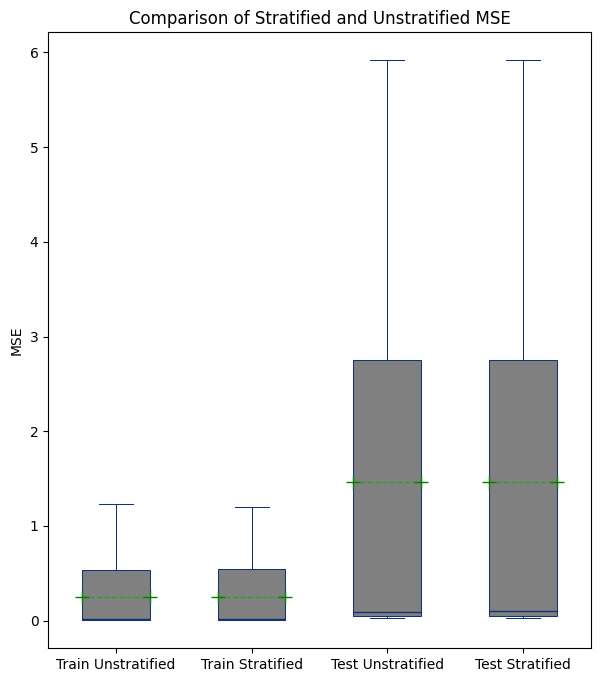

In [15]:
create_boxplot(data, 'mse', 'Comparison of Stratified and Unstratified MSE')

C:\Users\anneg\AppData\Local\Temp\ipykernel_19172\3300873400.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])


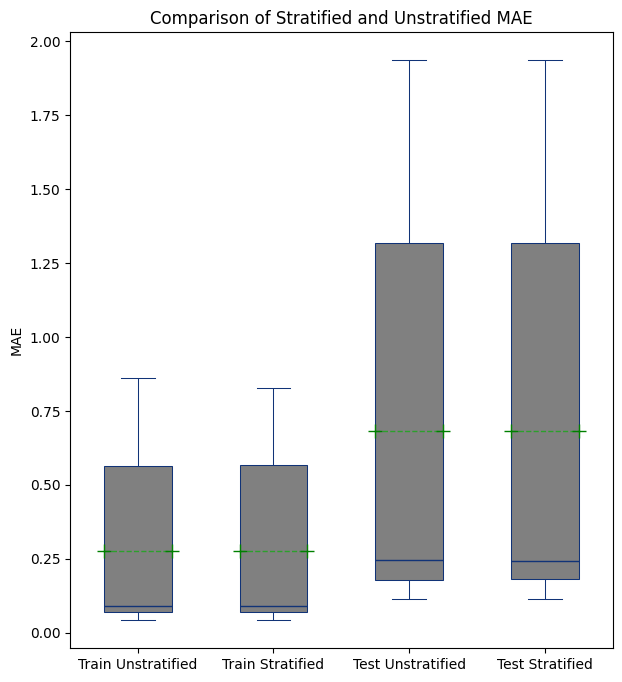

In [16]:
create_boxplot(data, 'mae', 'Comparison of Stratified and Unstratified MAE')